<a href="https://colab.research.google.com/github/zohaib304/MachineLearning/blob/main/StreetEasy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/streeteasy dataset/manhattan.csv')

In [49]:
# Let’s take a look at the first few rows using
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state=42)

In [53]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2831, 13) (708, 13) (2831, 1) (708, 1)


Now we have the training set and the test set, let’s use scikit-learn to build the linear regression model!

In [54]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [55]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print(model.coef_)
print(model.intercept_)

[[-333.89294751 1086.74559639    5.08928622   23.85108584   -6.87986541
   -96.3135918    29.34042914   73.95469307 -139.3051366    72.43825987
     4.79366047 -134.91701818   16.66156345]]
[-562.24209936]


In [57]:
y_predict = model.predict(x_test)

let’s test it

In [58]:
my_apartment = [[1, 1, 620, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
yy = model.predict(my_apartment)
print(yy)

[[2543.11002331]]


Visualizing Results with Matplotlib

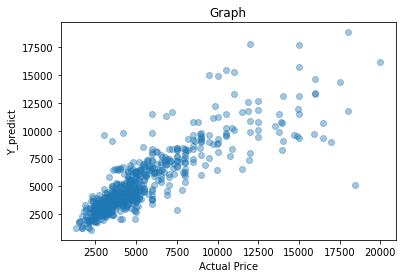

In [59]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('Actual Price')
plt.ylabel('Y_predict')
plt.title('Graph')
plt.show()

Correlations

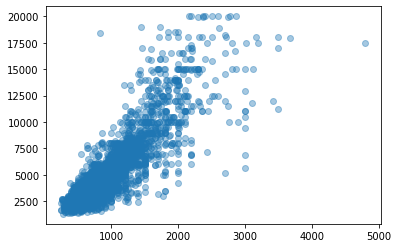

In [60]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

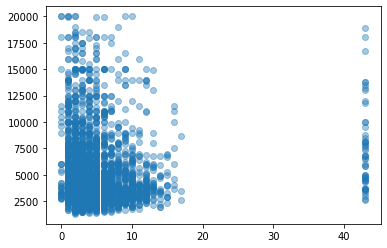

In [61]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)

Evaluating the Model's Accuracy

In [62]:
print('Traing Score')
print(model.score(x_train, y_train))

print('Test Score')
print(model.score(x_test, y_test))

Traing Score
0.785624922705057
Test Score
0.7465392934185306


Graph a scatter plot of residuals vs. predicted_y values:

In [63]:
residuals = y_predict - y_test

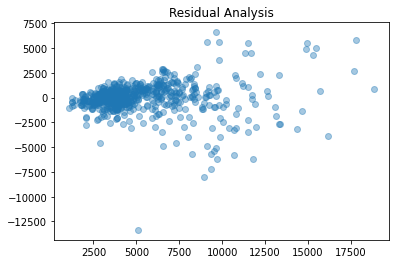

In [64]:
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
 
plt.show()

Remove some of the features that don’t have strong correlations and see if your scores improved!